In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# To address false positive reporting in centers.py
pd.options.mode.chained_assignment = None

In [3]:
from scipy.optimize import linear_sum_assignment

import os
import sys
from center.centers import get_centroids, get_medoids, get_modes, get_std, centers_df_to_dict
from match.hungarian import match_clusters, min_cluster_assignment
from distance.emd import get_emd
from redlining.redlining import get_holc_grade, holc_grade_counts_to_dict, get_all_redlining_value_counts, \
    run_chi_square_test, normalize_count_dict

In [4]:
from clustering.distance.distances import haversine_np, meters_to_hav, RADIUS_OF_EARTH_AT_SPACE_NEEDLE

In [5]:
data_path = '../clustering/test.csv'

In [6]:
df = pd.read_csv(data_path)

In [7]:
df_filtered = df[df['cluster_labs']!=-1]

In [8]:
count_df = df_filtered.groupby(['Year', 'Sector', 'cluster_labs']).size().reset_index(name='counts')

In [9]:
centroids_df = df_filtered.groupby(['Year', 'Sector', 'cluster_labs']).agg({
    'Latitude': 'mean',
    'Longitude': 'mean'
}).reset_index()

In [10]:
final_df = pd.merge(count_df, centroids_df, on=['Year', 'Sector', 'cluster_labs'], how='left')

In [11]:
final_df.head()

,Year,Sector,cluster_labs,counts,Latitude,Longitude
0,2008,B,0,76,47.675414,-122.365966
1,2008,B,1,108,47.648607,-122.333949
2,2008,B,2,147,47.662335,-122.370244
3,2008,B,3,51,47.671548,-122.354540
4,2008,B,4,1718,47.657312,-122.344792


In [14]:
fig = px.scatter_mapbox(final_df[final_df['Sector']=='B'],
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="cluster_labs",
                        hover_data=["cluster_labs"],
                        color="cluster_labs",
                        size="counts",  # Include the size parameter
                        animation_frame="Year",
                        zoom=10,
                        height=800,
                        width=800)

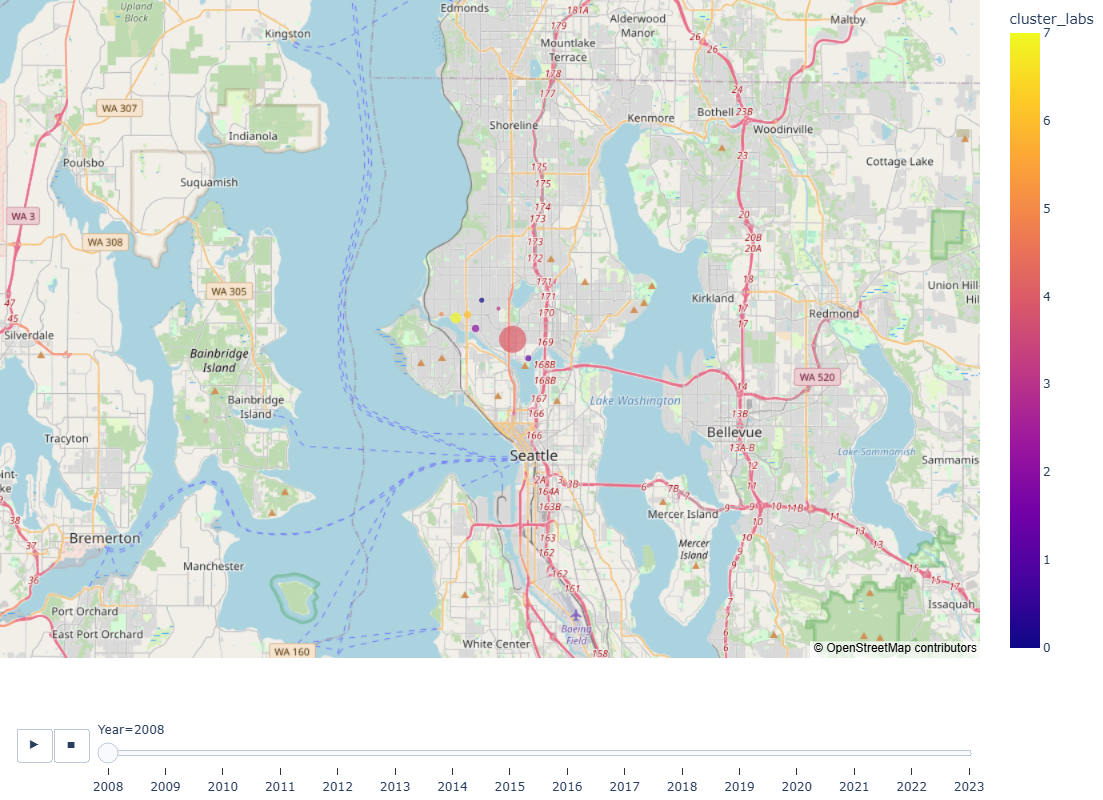

In [15]:
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()